# The Gradient descent algorithm is implemented in this Python code

480.46097431633325


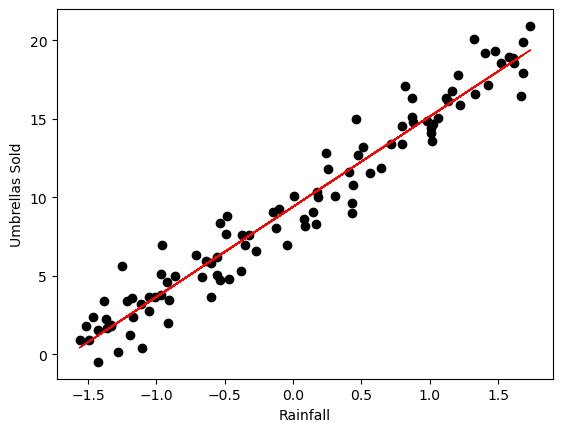

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def Feature_scaling(X):

    meanx = np.zeros(X.shape[0])
    meanx = X.mean()
    stdx = np.zeros(X.shape[0])
    stdx = X.std(ddof=1) 
    # Normalization is applied on x values 
    Xnorm = X
    Xnorm = np.subtract(X, meanx)
    Xnorm = Xnorm /stdx
    
    return [Xnorm, meanx, stdx]


df = pd.read_csv("synthetic_umbrella_data.csv") # Creating pandas data frame
# print(df.head())
X = np.asarray(df.Rainfall)
X = Feature_scaling(X)[0] # mean values are obtained
meanx = Feature_scaling (X)[1]
stdx = Feature_scaling (X)[2]

X = X.reshape(-1, 1)
num_rows, num_columns = X.shape
X = np.hstack((X,np.ones((num_rows,1))))

y = np.asarray(df.UmbrellasSold)



def gradientDescent(X, y, theta, alpha, numiters): # number of training examples
    p = len(y)
    # Initialize J_history and Theta_history 
    Jhistory = []
    Thetahistory = []
    for i in range(numiters):
        # Calculate h = X * theta
        h = np.sum(np.multiply(X,theta), axis=1) # Calculate the error = (h - y)
        error = np.subtract(h, y) # Calculate the new theta
        thetanew = alpha * 1/p * np.sum(np.multiply(X.T, error), axis=1)
        # Update theta
        theta = np.subtract(theta, thetanew) # Collect all the theta and J
        Thetahistory.append(theta.tolist())
        # Jhistory.append(calcCostFunction(X,y,theta).tolist())
    return theta, Thetahistory, Jhistory # Running the Gradient Descent

# Initialize theta
theta = np.asarray([0,0]).astype(float)
# Set the number of iterations for the Gradient Descent 
iterations = 2000
# Set the Learning Rate 
alpha = 0.01
# Run the gradientDescent() function, and collect the output in “results”
results = gradientDescent(X, y, theta, alpha, iterations) # Get the theta from the results
theta = results[0] # new theta # Get the theta history
Thetahistory = results [1] # Theta history # Get the J history
Jhistory = results [2] # Cost function history plt.scatter(X[:, [1], y, color='blue')

# Plot Hypothesis (theta as calculated with the Gradient Descent)
plt.scatter(X[:, 0], y, color='black')
plt.plot(X[:, 0], np.sum(np.multiply(X,theta), axis=1), color='red', linewidth=1)
plt.xlabel("Rainfall") 
plt.ylabel("Umbrellas Sold")

# theta_0 = np.asarray(Thetahistory)[:,0]
# theta_1 = np.asarray(Thetahistory)[:, 1]
# plt.plot(theta_0[0:len(theta_0)], color='red', linewidth=1)
# plt.plot(theta_1[0:len(theta_1)], color='green', linewidth=1)
# plt.xlabel("Iterations") 
# plt.ylabel("theta")

# plt.plot(Jhistory[0:len(Jhistory)], color='blue', linewidth=1)
# # Put labels
# plt.xlabel("Iterations") 
# plt.ylabel("J")

# Now if we predict the rainfall in mm to be 82mm, we predict the corresponding number of umbrellas sold.
query = [82, 1]
# Scale and Normalize the query 
queryNormalized = [((query [0]-meanx)/stdx),1]
prediction = np.sum(np.multiply(queryNormalized, theta)) 
print(prediction)